In [1]:
from lolviz import *
import random

# Hashtable Behind the Scenes
## Application of Hashtable

## Motivation: how do we enjoy the speed of hash functions in our daily python work?
* Cache the function results to avoid repeated computation
* Use hashtable to speed up the look up

### Case 1: find the nth number in Fibonacci Sequence

In [2]:
%%time
# find the nth number in Fibonacci Sequence: 
# the next number is found by adding up the two numbers before it
def slow_fib(n: int) -> int:
    if n <= 1:
        return n
    else:
        return slow_fib(n-1) + slow_fib(n-2)

slow_fib(40)

CPU times: user 26.4 s, sys: 93.4 ms, total: 26.5 s
Wall time: 26.5 s


102334155

In [3]:
# decorator to cache a function result

def cache(hash_table: dict):
    def decorator(f):
        def wrapper(*args, **kwargs):

            # whenever a function is called, the first thing we do is to 
            # check if there is a record of the specific input in the cache
            key = str(args) + str(kwargs)

            # if there is a record, return the result
            if key in hash_table:
                return hash_table[key]
            
            # if there is no record in hash table, we call the function and store the result
            else:
                result = f(*args, **kwargs)
                hash_table[key] = result
                return result
        return wrapper
    return decorator


In [4]:
%%time
hash = {}

@cache(hash)
def fib(n: int) -> int:
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

fib(1000)

CPU times: user 2.57 ms, sys: 661 µs, total: 3.23 ms
Wall time: 3.6 ms


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

/var/folders/46/t920_b151x79kq89j0ffx0g80000gn/T/ipykernel_23608/4057893322.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  lolviz(random.sample(hash.items(), 10))


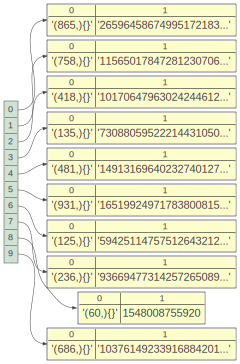

In [5]:
# what's inside hash
lolviz(random.sample(hash.items(), 10))

In [6]:
%%time
# in python we don't have to define our own cache decorator, we can just do this

from functools import cache


@cache
def fib(n: int) -> int:
    if n <= 1:
        return n
    else:
        return fib(n-1) + fib(n-2)

fib(1000)

CPU times: user 564 µs, sys: 529 µs, total: 1.09 ms
Wall time: 1.5 ms


43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

#### Recommender application

In [27]:
import pandas as pd
from Recommender import Recommender

# from sentence_transformers import SentenceTransformer
# from sentence_transformers.util import cos_sim

interactions_file = "./users_interactions.csv"
articles_file = "./shared_articles.csv"

reco = Recommender(interactions_file, articles_file)

### Dataset

In [4]:
articles = pd.read_csv(articles_file)
articles.columns.tolist()

['timestamp',
 'eventType',
 'contentId',
 'authorPersonId',
 'authorSessionId',
 'authorUserAgent',
 'authorRegion',
 'authorCountry',
 'contentType',
 'url',
 'title',
 'text',
 'lang']

In [51]:
articles.head()[['timestamp','title','text', 'lang']]

,timestamp,title,text,lang
0,1459192779,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
1,1459193988,"Ethereum, a Virtual Currency, Enables Transact...",All of this work is still very early. The firs...,en
2,1459194146,Bitcoin Future: When GBPcoin of Branson Wins O...,The alarm clock wakes me at 8:00 with stream o...,en
3,1459194474,Google Data Center 360° Tour,We're excited to share the Google Data Center ...,en
4,1459194497,"IBM Wants to ""Evolve the Internet"" With Blockc...",The Aite Group projects the blockchain market ...,en


In [48]:
articles.head(1).title.values[0]

"Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's"

In [18]:
articles.head(1).text.values[0][:500]

'All of this work is still very early. The first full public version of the Ethereum software was recently released, and the system could face some of the same technical and legal problems that have tarnished Bitcoin. Many Bitcoin advocates say Ethereum will face more security problems than Bitcoin because of the greater complexity of the software. Thus far, Ethereum has faced much less testing, and many fewer attacks, than Bitcoin. The novel design of Ethereum may also invite intense scrutiny by'

In [26]:
interactions = pd.read_csv(interactions_file)
interactions.head()

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN


In [20]:
from collections import Counter

Counter(interactions.eventType)

Counter({'VIEW': 61086,
         'FOLLOW': 1407,
         'BOOKMARK': 2463,
         'LIKE': 5745,
         'COMMENT CREATED': 1611})

In [22]:
event_type_strength = {
            'VIEW': 1.0,
            'LIKE': 2.0,
            'BOOKMARK': 2.5,
            'FOLLOW': 3.0,
            'COMMENT CREATED': 4.0}

In [23]:
interactions['score'] = interactions['eventType'].apply(
            lambda x: event_type_strength[x])


In [25]:
interactions.head()[['score', 'contentId', 'personId']]

,score,contentId,personId
0,1.0,-3499919498720038879,-8845298781299428018
1,1.0,8890720798209849691,-1032019229384696495
2,1.0,310515487419366995,-1130272294246983140
3,3.0,310515487419366995,344280948527967603
4,1.0,-7820640624231356730,-445337111692715325


In [29]:
reco.titles[:10]

["Ethereum, a Virtual Currency, Enables Transactions That Rival Bitcoin's",
 'Bitcoin Future: When GBPcoin of Branson Wins Over USDcoin of Trump',
 'Google Data Center 360° Tour',
 'IBM Wants to "Evolve the Internet" With Blockchain Technology',
 'IEEE to Talk Blockchain at Cloud Computing Oxford-Con - CoinDesk',
 'Banks Need To Collaborate With Bitcoin and Fintech Developers',
 'Blockchain Technology Could Put Bank Auditors Out of Work',
 'Why Decentralized Conglomerates Will Scale Better than Bitcoin - Interview with OpenLedger CEO - Bitcoin News',
 'The Rise And Growth of Ethereum Gets Mainstream Coverage',
 'Setting Up HTTP(S) Load Balancing']

#### Similar content

In [44]:
ix = 3
print(reco.titles[ix])
print("\n")
for similar_item in reco.similar_db[idx][:10]:
    print(reco.titles[similar_item])

IBM Wants to "Evolve the Internet" With Blockchain Technology


Wall Street Goes Big on Bitcoin Tech
Innovate Finance Allows Bitfury to Join With Bitcoin
EB124 - Rune Christensen: Maker Dao Ethereum's Decentralized Central Bank by Epicenter Bitcoin
Blockchain open sources Thunder network, paving the way for instant bitcoin transactions
Mozilla Founder Unveils 'Brave Ledger' with Bitcoin Micropayments
For Blockchain VCs, the Time for Ethereum Investments Has Come - CoinDesk
Bitcoin Mining, Ethereum Mining, Cloud Mining: 2016 Overview
Stratumn is building a sort of Heroku for blockchain applications - The Bitcoin Channel
Bitit Launches to Solve Bitcoin Biggest Issues - Accessibility and Fraud
MedStar Washington Potentially Affected By Bitcoin Ransomware
